In [1]:
%pylab inline
import pandas as pd
from IPython.display import display, HTML


Populating the interactive namespace from numpy and matplotlib


In [2]:
import fastparquet
reload(fastparquet)

<module 'fastparquet' from '/home/spark/anaconda2/lib/python2.7/site-packages/fastparquet/__init__.pyc'>

In [7]:
%time data = pd.read_csv('../input/targets_processed.csv',index_col=0,header=None)

CPU times: user 42.9 s, sys: 5.38 s, total: 48.3 s
Wall time: 48.3 s


In [8]:
data.columns=[ u'customer_id', u'market', u'date', u'target', u'age',
       u'latest_target', u'count', u'freq', u'latest3_mean',
       u'changed_count', u'latest2_change', u'latest2_mean']
data.index.name='id'

In [9]:
data.head()

customer_id    market  date  target  age  latest_target   count  \
id                                                                           
10050258  135277083289  3.532056     0       1    0        -9999.0 -9999.0   
13014732  135277083289  3.532056     2       1    2            1.0     1.0   
15244950  135277083289  3.532056     3       0    3            1.0     2.0   
18950100  135277083289  3.532056     5       0    5            0.0     3.0   
21160726  135277083289  3.532056     6       0    6            0.0     4.0   

                 freq  latest3_mean  changed_count  latest2_change  \
id                                                                   
10050258 -9999.000000       -9999.0        -9999.0         -9999.0   
13014732     0.500000       -9999.0            0.0         -9999.0   
15244950     0.666667       -9999.0            0.0             0.0   
18950100     0.600000           7.0            1.0            -1.0   
21160726     0.666667           3.0            1.0             0.0   

          latest2_mean  
id                      
10050258       -9999.0  
13014732       -9999.0  
15244950          10.0  
18950100           5.0  
21160726           0.0

In [10]:
data.shape

(28140728, 12)

In [11]:
from IPython.core.display import display, HTML

In [12]:
train=data[data['target']!=-1]
train.shape

(21938149, 12)

In [13]:
test=data[data['target']==-1]
test.shape

(6202579, 12)

In [14]:
for col in train.columns:
    if col in ['customer_id','target']: continue
    a=train[col].value_counts()
    a=a/float(a.sum())
    b=test[col].value_counts()
    b=b/float(b.sum())
    df=pd.concat([a,b],axis=1)
    print col
    display(df)

market


market    market
3.241651  0.043941  0.010426
3.380680  0.031731  0.031700
3.397906  0.043113  0.042320
3.409593  0.033045  0.035261
3.474933  0.037850  0.038196
3.485725  0.052266  0.052442
3.528607  0.027742  0.010074
3.532056  0.188764  0.196023
3.533247  0.014677  0.015210
3.599124  0.042943  0.045596
3.657980  0.022374  0.022633
3.672879  0.025067  0.025787
3.801248  0.038729  0.039352
3.831468  0.040842  0.039830
3.951228  0.035314  0.037454
3.989629  0.041109  0.041142
4.089241  0.017335  0.017718
4.098931  0.023523  0.025188
4.113730  0.053151  0.054883
4.191529  0.031235  0.033705
4.312646  0.022675  0.033147
4.450314  0.015861  0.029487
4.565140  0.023924  0.025753
4.636055  0.092789  0.096674

date


date      date
0   0.101213       NaN
1   0.033918       NaN
2   0.101660       NaN
3   0.101425       NaN
4   0.067476       NaN
5   0.100775       NaN
6   0.100337       NaN
7   0.099716       NaN
8   0.098862       NaN
9   0.097853       NaN
10  0.096764       NaN
11       NaN  0.338431
12       NaN  0.334544
13       NaN  0.327024

age


age       age
0   0.137101  0.037154
1   0.063574  0.027495
2   0.118403  0.026526
3   0.114076  0.026877
4   0.080264  0.028835
5   0.100775  0.031301
6   0.092484  0.038579
7   0.086208  0.036974
8   0.079202  0.038236
9   0.067037  0.052383
10  0.060877  0.655642

latest_target


latest_target  latest_target
-9999.0       0.137101       0.064842
 0.0          0.017862       0.020489
 1.0          0.213322       0.220191
 2.0          0.142754       0.149146
 3.0          0.099931       0.106783
 4.0          0.072249       0.078612
 5.0          0.094541       0.104116
 6.0          0.057329       0.064290
 7.0          0.064011       0.072914
 8.0          0.033589       0.038869
 9.0          0.032415       0.037960
 10.0         0.014335       0.016970
 11.0         0.007308       0.008770
 12.0         0.007560       0.009142
 13.0         0.003754       0.004544
 14.0         0.001711       0.002075
 15.0         0.000098       0.000131
 16.0         0.000070       0.000090
 17.0         0.000034       0.000038
 18.0         0.000022       0.000022
 20.0         0.000005       0.000006

count


count     count
-9999.0  0.137101  0.037154
 1.0     0.126593  0.029395
 2.0     0.120619  0.028626
 3.0     0.113137  0.029637
 4.0     0.105449  0.032411
 5.0     0.098082  0.035837
 6.0     0.088954  0.044309
 7.0     0.080517  0.048651
 8.0     0.070270  0.058547
 9.0     0.046809  0.106951
 10.0    0.012471  0.548482

freq


freq      freq
-9999.000000  0.137101  0.037154
 0.076923          NaN  0.000934
 0.083333          NaN  0.000537
 0.090909          NaN  0.000429
 0.100000     0.000118       NaN
 0.111111     0.000116       NaN
 0.125000     0.000142       NaN
 0.142857     0.000165       NaN
 0.153846          NaN  0.000905
 0.166667     0.000181  0.000614
 0.181818          NaN  0.000582
 0.200000     0.000471       NaN
 0.222222     0.000191       NaN
 0.230769          NaN  0.001094
 0.250000     0.000401  0.000829
 0.272727          NaN  0.000838
 0.285714     0.000254       NaN
 0.300000     0.000263       NaN
 0.307692          NaN  0.001306
 0.333333     0.000976  0.001094
 0.363636          NaN  0.001177
 0.375000     0.000340       NaN
 0.384615          NaN  0.001548
 0.400000     0.000811       NaN
 0.416667          NaN  0.001431
 0.428571     0.000507       NaN
 0.444444     0.000414       NaN
 0.454545          NaN  0.001558
 0.461538          NaN  0.001921
 0.500000     0.063497  0.001822
 0.538462          NaN  0.002319
 0.545455          NaN  0.001987
 0.555556     0.000678       NaN
 0.571429     0.000705       NaN
 0.583333          NaN  0.002263
 0.600000     0.018485       NaN
 0.615385          NaN  0.002788
 0.625000     0.000805       NaN
 0.636364          NaN  0.002993
 0.666667     0.079602  0.003318
 0.692308          NaN  0.003928
 0.700000     0.000992       NaN
 0.714286     0.016070       NaN
 0.727273          NaN  0.003887
 0.750000     0.056662  0.004314
 0.769231          NaN  0.004998
 0.777778     0.014433       NaN
 0.800000     0.061633       NaN
 0.818182          NaN  0.044950
 0.833333     0.045796  0.043280
 0.846154          NaN  0.039760
 0.857143     0.043437       NaN
 0.875000     0.040021  0.004102
 0.888889     0.034875  0.014420
 0.900000     0.031675  0.015796
 0.909091          NaN  0.110474
 0.916667          NaN  0.099811
 0.923077          NaN  0.088609
 1.000000     0.348185  0.450231

latest3_mean


latest3_mean  latest3_mean
-9999.0  3.843121e-01  1.230786e-01
 0.0     1.030971e-02  1.610991e-02
 3.0     7.164232e-04  9.105890e-04
 7.0     1.093073e-03  1.357177e-03
 10.0    1.322382e-01  1.847659e-01
 13.0    7.057068e-03  8.354750e-03
 17.0    9.283327e-03  1.054448e-02
 20.0    8.544850e-02  1.222030e-01
 23.0    8.834975e-03  9.796893e-03
 27.0    7.701379e-03  8.525970e-03
 30.0    6.085158e-02  8.885707e-02
 33.0    6.542393e-03  7.202972e-03
 37.0    7.828418e-03  8.351204e-03
 40.0    4.365359e-02  6.525931e-02
 43.0    7.176221e-03  7.500751e-03
 47.0    5.538754e-03  5.872235e-03
 50.0    5.599980e-02  8.546155e-02
 53.0    5.049287e-03  5.289413e-03
 57.0    5.939106e-03  6.118906e-03
 60.0    3.352644e-02  5.264326e-02
 63.0    5.181021e-03  5.223956e-03
 67.0    3.705463e-03  3.863877e-03
 70.0    3.725934e-02  5.956409e-02
 73.0    2.999114e-03  3.047926e-03
 77.0    3.425038e-03  3.479198e-03
 80.0    1.938764e-02  3.162555e-02
 83.0    2.670690e-03  2.607625e-03
 87.0    1.893414e-03  1.940483e-03
 90.0    1.862924e-02  3.079122e-02
 93.0    1.373635e-03  1.386520e-03
 97.0    1.267427e-03  1.312841e-03
 100.0   8.211768e-03  1.377556e-02
 103.0   7.969223e-04  8.188529e-04
 107.0   6.830567e-04  6.793948e-04
 110.0   4.224194e-03  7.171372e-03
 113.0   5.302179e-04  5.105941e-04
 117.0   3.954299e-04  3.917725e-04
 120.0   4.259749e-03  7.281165e-03
 123.0   2.819290e-04  2.866550e-04
 127.0   2.454172e-04  2.623102e-04
 130.0   2.096166e-03  3.623815e-03
 133.0   1.360188e-04  1.381683e-04
 137.0   8.678946e-05  8.835035e-05
 140.0   9.866375e-04  1.658826e-03
 143.0   1.303665e-05  1.209174e-05
 147.0   1.590836e-05  1.467132e-05
 150.0   5.684162e-05  1.022155e-04
 153.0   8.478382e-06  8.706056e-06
 157.0   2.507048e-06  1.934679e-06
 160.0   3.769689e-05  6.997089e-05
 163.0   2.096804e-06  2.902019e-06
 167.0   2.461466e-06  9.673396e-07
 170.0   1.736701e-05  2.982630e-05
 173.0   1.002819e-06  4.836698e-07
 177.0   5.925751e-07  4.836698e-07
 180.0   1.248966e-05  1.628355e-05
 187.0   4.558270e-08           NaN
 190.0   9.116539e-08           NaN
 200.0   2.689379e-06  5.320368e-06

changed_count


changed_count  changed_count
-9999.0   1.371008e-01       0.037154
 0.0      6.329224e-01       0.469848
 1.0      1.612699e-01       0.301238
 2.0      4.547667e-02       0.099491
 3.0      1.753858e-02       0.061046
 4.0      4.248672e-03       0.020434
 5.0      1.197047e-03       0.007770
 6.0      2.090422e-04       0.002361
 7.0      3.409586e-05       0.000549
 8.0      2.598214e-06       0.000101
 9.0      1.367481e-07       0.000009
 10.0              NaN       0.000001

latest2_change


latest2_change  latest2_change
-9999.0    2.636933e-01    9.467594e-02
-20.0      1.367481e-07             NaN
-18.0      1.048402e-06    2.418349e-06
-17.0      7.749059e-07             NaN
-16.0      6.837405e-07    4.836698e-07
-15.0      1.093985e-06    6.448930e-07
-14.0      9.663532e-06    9.189726e-06
-13.0      1.517904e-05    1.644477e-05
-12.0      3.044924e-05    2.660184e-05
-11.0      5.196427e-05    4.320783e-05
-10.0      8.282376e-05    5.368735e-05
-9.0       1.578073e-04    1.262378e-04
-8.0       3.123782e-04    2.379655e-04
-7.0       5.255685e-04    4.238559e-04
-6.0       1.027115e-03    8.227223e-04
-5.0       1.762956e-03    1.491799e-03
-4.0       3.359262e-03    2.861874e-03
-3.0       5.741642e-03    4.893610e-03
-2.0       1.043639e-02    9.153934e-03
-1.0       1.873162e-02    1.712820e-02
 0.0       6.548167e-01    8.306271e-01
 1.0       1.780428e-02    1.692731e-02
 2.0       9.729080e-03    9.236158e-03
 3.0       5.272095e-03    4.930530e-03
 4.0       2.984026e-03    2.933618e-03
 5.0       1.540604e-03    1.450364e-03
 6.0       8.886803e-04    9.033339e-04
 7.0       4.589722e-04    4.427191e-04
 8.0       2.623740e-04    2.611817e-04
 9.0       1.339675e-04    1.338153e-04
 10.0      6.942245e-05    8.431976e-05
 11.0      4.517245e-05    4.901187e-05
 12.0      2.730404e-05    2.918141e-05
 13.0      1.349248e-05    1.193052e-05
 14.0      8.022555e-06    7.577493e-06
 15.0      1.276316e-06    1.934679e-06
 16.0      1.048402e-06    6.448930e-07
 17.0      3.646616e-07    4.836698e-07
 18.0      1.093985e-06             NaN
 20.0      1.367481e-07             NaN

latest2_mean


latest2_mean  latest2_mean
-9999.0  2.636933e-01      0.094676
 0.0     1.362284e-02      0.018263
 5.0     1.042112e-03      0.001058
 10.0    1.693324e-01      0.201844
 15.0    9.431334e-03      0.008956
 20.0    1.132107e-01      0.136610
 25.0    8.533354e-03      0.007934
 30.0    8.027277e-02      0.098786
 35.0    7.905179e-03      0.007249
 40.0    5.926694e-02      0.073782
 45.0    6.803172e-03      0.006214
 50.0    7.414071e-02      0.094783
 55.0    5.622762e-03      0.004951
 60.0    4.595675e-02      0.059574
 65.0    4.419744e-03      0.003986
 70.0    4.965232e-02      0.066077
 75.0    3.253283e-03      0.002898
 80.0    2.665398e-02      0.035686
 85.0    2.232686e-03      0.002040
 90.0    2.493879e-02      0.034155
 95.0    1.383754e-03      0.001274
 100.0   1.115340e-02      0.015378
 105.0   7.720797e-04      0.000723
 110.0   5.764980e-03      0.008053
 115.0   4.415596e-04      0.000400
 120.0   5.739956e-03      0.008114
 125.0   2.756842e-04      0.000258
 130.0   2.860770e-03      0.004058
 135.0   1.197913e-04      0.000115
 140.0   1.302526e-03      0.001829
 145.0   1.435855e-05      0.000011
 150.0   8.109162e-05      0.000122
 155.0   5.105262e-06      0.000004
 160.0   5.205544e-05      0.000082
 165.0   1.914473e-06      0.000001
 170.0   2.470582e-05      0.000032
 175.0   8.660712e-07      0.000001
 180.0   1.645535e-05      0.000020
 185.0   9.116539e-08           NaN
 190.0   4.558270e-08           NaN
 200.0   3.601033e-06      0.000006

In [15]:
test=data[(data['target']==-1) & (data['date']==11)]
test.shape

(2099147, 12)

In [16]:
for col in train.columns:
    if col in ['customer_id','target']: continue
    a=train[col].value_counts()
    a=a/float(a.sum())
    b=test[col].value_counts()
    b=b/float(b.sum())
    df=pd.concat([a,b],axis=1)
    print col
    display(df)

market


market    market
3.241651  0.043941  0.018815
3.380680  0.031731  0.031733
3.397906  0.043113  0.042433
3.409593  0.033045  0.034626
3.474933  0.037850  0.037862
3.485725  0.052266  0.051773
3.528607  0.027742  0.014835
3.532056  0.188764  0.194214
3.533247  0.014677  0.015313
3.599124  0.042943  0.044867
3.657980  0.022374  0.022215
3.672879  0.025067  0.025432
3.801248  0.038729  0.039313
3.831468  0.040842  0.039692
3.951228  0.035314  0.037026
3.989629  0.041109  0.040620
4.089241  0.017335  0.017469
4.098931  0.023523  0.024661
4.113730  0.053151  0.054623
4.191529  0.031235  0.033021
4.312646  0.022675  0.031966
4.450314  0.015861  0.026902
4.565140  0.023924  0.025048
4.636055  0.092789  0.095542

date


date  date
0   0.101213   NaN
1   0.033918   NaN
2   0.101660   NaN
3   0.101425   NaN
4   0.067476   NaN
5   0.100775   NaN
6   0.100337   NaN
7   0.099716   NaN
8   0.098862   NaN
9   0.097853   NaN
10  0.096764   NaN
11       NaN   1.0

age


age       age
0   0.137101  0.026710
1   0.063574  0.026138
2   0.118403  0.025530
3   0.114076  0.027747
4   0.080264  0.031923
5   0.100775  0.032817
6   0.092484  0.049254
7   0.086208  0.027181
8   0.079202  0.036544
9   0.067037  0.091056
10  0.060877  0.625099

latest_target


latest_target  latest_target
-9999.0       0.137101       0.026710
 0.0          0.017862       0.021626
 1.0          0.213322       0.233172
 2.0          0.142754       0.156321
 3.0          0.099931       0.111251
 4.0          0.072249       0.081628
 5.0          0.094541       0.107646
 6.0          0.057329       0.066188
 7.0          0.064011       0.074705
 8.0          0.033589       0.039688
 9.0          0.032415       0.038660
 10.0         0.014335       0.017257
 11.0         0.007308       0.008892
 12.0         0.007560       0.009260
 13.0         0.003754       0.004608
 14.0         0.001711       0.002098
 15.0         0.000098       0.000131
 16.0         0.000070       0.000092
 17.0         0.000034       0.000038
 18.0         0.000022       0.000022
 20.0         0.000005       0.000006

count


count     count
-9999.0  0.137101  0.026710
 1.0     0.126593  0.027407
 2.0     0.120619  0.027249
 3.0     0.113137  0.030223
 4.0     0.105449  0.035401
 5.0     0.098082  0.037419
 6.0     0.088954  0.055125
 7.0     0.080517  0.048146
 8.0     0.070270  0.066395
 9.0     0.046809  0.202118
 10.0    0.012471  0.443807

freq


freq      freq
-9999.000000  0.137101  0.026710
 0.090909          NaN  0.001269
 0.100000     0.000118       NaN
 0.111111     0.000116       NaN
 0.125000     0.000142       NaN
 0.142857     0.000165       NaN
 0.166667     0.000181       NaN
 0.181818          NaN  0.001718
 0.200000     0.000471       NaN
 0.222222     0.000191       NaN
 0.250000     0.000401       NaN
 0.272727          NaN  0.002475
 0.285714     0.000254       NaN
 0.300000     0.000263       NaN
 0.333333     0.000976       NaN
 0.363636          NaN  0.003478
 0.375000     0.000340       NaN
 0.400000     0.000811       NaN
 0.428571     0.000507       NaN
 0.444444     0.000414       NaN
 0.454545          NaN  0.004602
 0.500000     0.063497       NaN
 0.545455          NaN  0.005871
 0.555556     0.000678       NaN
 0.571429     0.000705       NaN
 0.600000     0.018485       NaN
 0.625000     0.000805       NaN
 0.636364          NaN  0.008843
 0.666667     0.079602       NaN
 0.700000     0.000992       NaN
 0.714286     0.016070       NaN
 0.727273          NaN  0.011486
 0.750000     0.056662       NaN
 0.777778     0.014433       NaN
 0.800000     0.061633       NaN
 0.818182          NaN  0.132591
 0.833333     0.045796       NaN
 0.857143     0.043437       NaN
 0.875000     0.040021  0.012122
 0.888889     0.034875  0.030487
 0.900000     0.031675  0.008958
 0.909091          NaN  0.305839
 1.000000     0.348185  0.443551

latest3_mean


latest3_mean  latest3_mean
-9999.0  3.843121e-01  8.136543e-02
 0.0     1.030971e-02  1.715697e-02
 3.0     7.164232e-04  9.775399e-04
 7.0     1.093073e-03  1.469168e-03
 10.0    1.322382e-01  1.972954e-01
 13.0    7.057068e-03  9.013661e-03
 17.0    9.283327e-03  1.137224e-02
 20.0    8.544850e-02  1.286713e-01
 23.0    8.834975e-03  1.059240e-02
 27.0    7.701379e-03  9.215648e-03
 30.0    6.085158e-02  9.283533e-02
 33.0    6.542393e-03  7.776968e-03
 37.0    7.828418e-03  8.967928e-03
 40.0    4.365359e-02  6.788805e-02
 43.0    7.176221e-03  8.045649e-03
 47.0    5.538754e-03  6.301607e-03
 50.0    5.599980e-02  8.842687e-02
 53.0    5.049287e-03  5.643245e-03
 57.0    5.939106e-03  6.496925e-03
 60.0    3.352644e-02  5.418677e-02
 63.0    5.181021e-03  5.513668e-03
 67.0    3.705463e-03  4.081182e-03
 70.0    3.725934e-02  6.106242e-02
 73.0    2.999114e-03  3.200348e-03
 77.0    3.425038e-03  3.628617e-03
 80.0    1.938764e-02  3.230836e-02
 83.0    2.670690e-03  2.713483e-03
 87.0    1.893414e-03  2.038923e-03
 90.0    1.862924e-02  3.137655e-02
 93.0    1.373635e-03  1.440109e-03
 97.0    1.267427e-03  1.353883e-03
 100.0   8.211768e-03  1.402570e-02
 103.0   7.969223e-04  8.527273e-04
 107.0   6.830567e-04  7.012372e-04
 110.0   4.224194e-03  7.275336e-03
 113.0   5.302179e-04  5.240224e-04
 117.0   3.954299e-04  4.082611e-04
 120.0   4.259749e-03  7.370137e-03
 123.0   2.819290e-04  2.996455e-04
 127.0   2.454172e-04  2.705861e-04
 130.0   2.096166e-03  3.674826e-03
 133.0   1.360188e-04  1.419624e-04
 137.0   8.678946e-05  9.003657e-05
 140.0   9.866375e-04  1.679254e-03
 143.0   1.303665e-05  1.238598e-05
 147.0   1.590836e-05  1.476790e-05
 150.0   5.684162e-05  1.033753e-04
 153.0   8.478382e-06  9.051296e-06
 157.0   2.507048e-06  1.905536e-06
 160.0   3.769689e-05  7.145760e-05
 163.0   2.096804e-06  3.334688e-06
 167.0   2.461466e-06  9.527680e-07
 170.0   1.736701e-05  2.953581e-05
 173.0   1.002819e-06  4.763840e-07
 177.0   5.925751e-07  4.763840e-07
 180.0   1.248966e-05  1.667344e-05
 187.0   4.558270e-08           NaN
 190.0   9.116539e-08           NaN
 200.0   2.689379e-06  5.240224e-06

changed_count


changed_count  changed_count
-9999.0   1.371008e-01       0.026710
 0.0      6.329224e-01       0.463369
 1.0      1.612699e-01       0.309203
 2.0      4.547667e-02       0.103208
 3.0      1.753858e-02       0.063878
 4.0      4.248672e-03       0.021894
 5.0      1.197047e-03       0.008396
 6.0      2.090422e-04       0.002614
 7.0      3.409586e-05       0.000605
 8.0      2.598214e-06       0.000111
 9.0      1.367481e-07       0.000010
 10.0              NaN       0.000001

latest2_change


latest2_change  latest2_change
-9999.0    2.636933e-01    5.411674e-02
-20.0      1.367481e-07             NaN
-18.0      1.048402e-06    2.381920e-06
-17.0      7.749059e-07             NaN
-16.0      6.837405e-07    4.763840e-07
-15.0      1.093985e-06    9.527680e-07
-14.0      9.663532e-06    1.048045e-05
-13.0      1.517904e-05    1.762621e-05
-12.0      3.044924e-05    2.715389e-05
-11.0      5.196427e-05    4.525648e-05
-10.0      8.282376e-05    5.811885e-05
-9.0       1.578073e-04    1.329111e-04
-8.0       3.123782e-04    2.481961e-04
-7.0       5.255685e-04    4.487537e-04
-6.0       1.027115e-03    8.727354e-04
-5.0       1.762956e-03    1.573020e-03
-4.0       3.359262e-03    3.047428e-03
-3.0       5.741642e-03    5.242606e-03
-2.0       1.043639e-02    9.854003e-03
-1.0       1.873162e-02    1.852038e-02
 0.0       6.548167e-01    8.657855e-01
 1.0       1.780428e-02    1.826456e-02
 2.0       9.729080e-03    9.874487e-03
 3.0       5.272095e-03    5.252133e-03
 4.0       2.984026e-03    3.087445e-03
 5.0       1.540604e-03    1.523000e-03
 6.0       8.886803e-04    9.365709e-04
 7.0       4.589722e-04    4.601869e-04
 8.0       2.623740e-04    2.682042e-04
 9.0       1.339675e-04    1.376750e-04
 10.0      6.942245e-05    8.717827e-05
 11.0      4.517245e-05    5.097309e-05
 12.0      2.730404e-05    2.953581e-05
 13.0      1.349248e-05    1.190960e-05
 14.0      8.022555e-06    8.098528e-06
 15.0      1.276316e-06    1.905536e-06
 16.0      1.048402e-06    9.527680e-07
 17.0      3.646616e-07    4.763840e-07
 18.0      1.093985e-06             NaN
 20.0      1.367481e-07             NaN

latest2_mean


latest2_mean  latest2_mean
-9999.0  2.636933e-01      0.054117
 0.0     1.362284e-02      0.019358
 5.0     1.042112e-03      0.001147
 10.0    1.693324e-01      0.214739
 15.0    9.431334e-03      0.009713
 20.0    1.132107e-01      0.143592
 25.0    8.533354e-03      0.008659
 30.0    8.027277e-02      0.103105
 35.0    7.905179e-03      0.007828
 40.0    5.926694e-02      0.076746
 45.0    6.803172e-03      0.006696
 50.0    7.414071e-02      0.098063
 55.0    5.622762e-03      0.005309
 60.0    4.595675e-02      0.061349
 65.0    4.419744e-03      0.004240
 70.0    4.965232e-02      0.067709
 75.0    3.253283e-03      0.003051
 80.0    2.665398e-02      0.036477
 85.0    2.232686e-03      0.002143
 90.0    2.493879e-02      0.034796
 95.0    1.383754e-03      0.001324
 100.0   1.115340e-02      0.015653
 105.0   7.720797e-04      0.000751
 110.0   5.764980e-03      0.008167
 115.0   4.415596e-04      0.000419
 120.0   5.739956e-03      0.008219
 125.0   2.756842e-04      0.000268
 130.0   2.860770e-03      0.004111
 135.0   1.197913e-04      0.000120
 140.0   1.302526e-03      0.001850
 145.0   1.435855e-05      0.000011
 150.0   8.109162e-05      0.000123
 155.0   5.105262e-06      0.000004
 160.0   5.205544e-05      0.000084
 165.0   1.914473e-06      0.000001
 170.0   2.470582e-05      0.000031
 175.0   8.660712e-07      0.000001
 180.0   1.645535e-05      0.000020
 185.0   9.116539e-08           NaN
 190.0   4.558270e-08           NaN
 200.0   3.601033e-06      0.000006

[-9999, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 200]
-9999


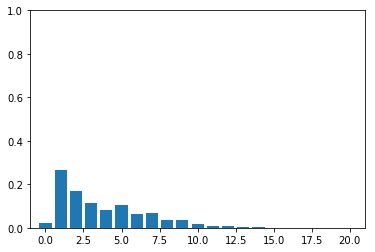

0


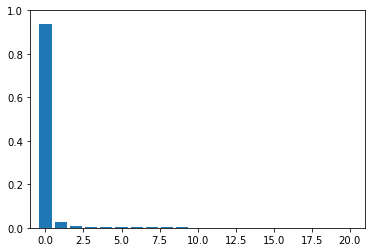

5


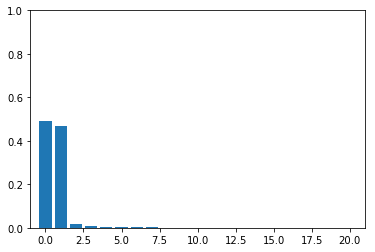

10


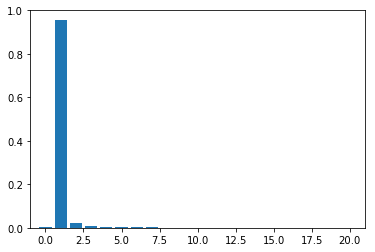

15


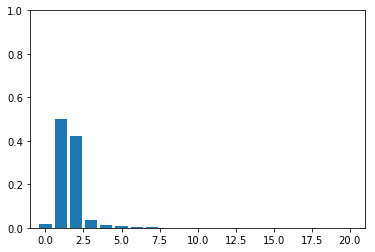

20


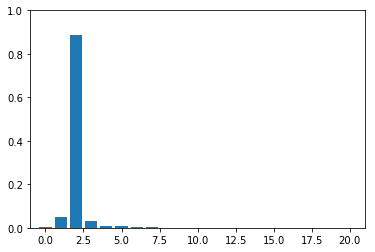

25


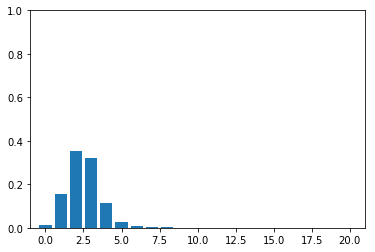

30


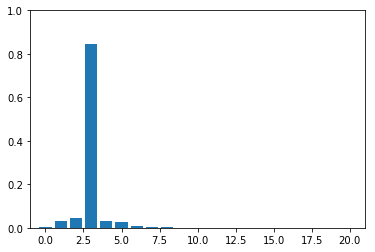

35


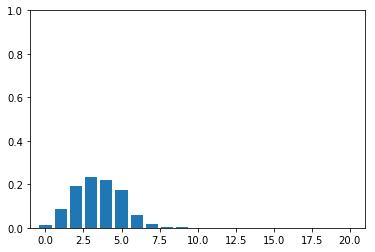

40


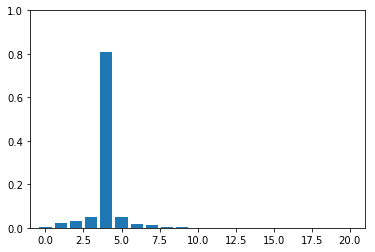

45


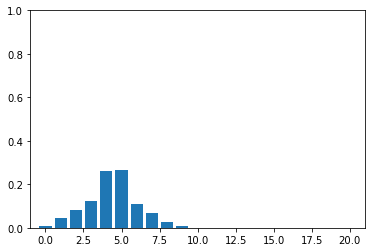

50


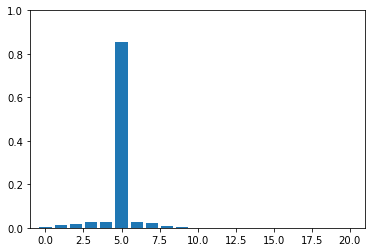

55


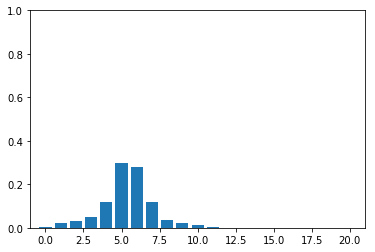

60


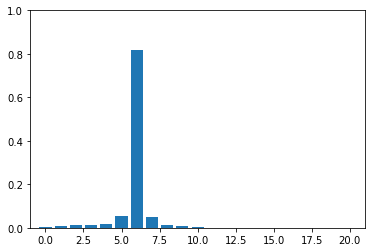

65


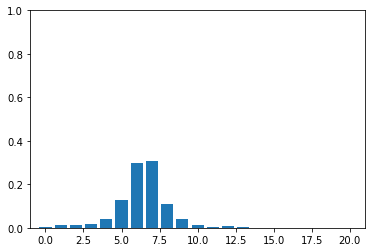

70


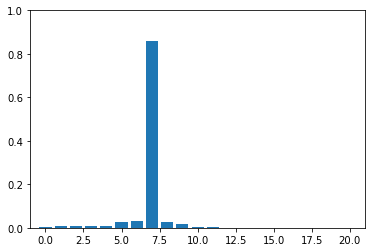

75


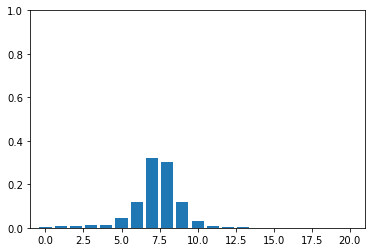

80


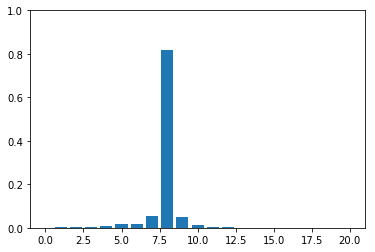

85


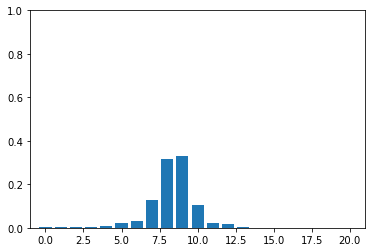

90


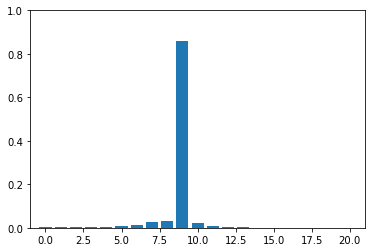

95


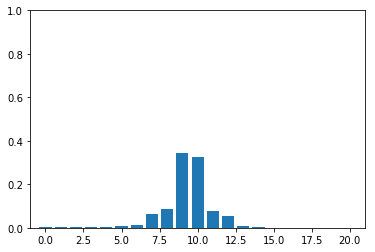

100


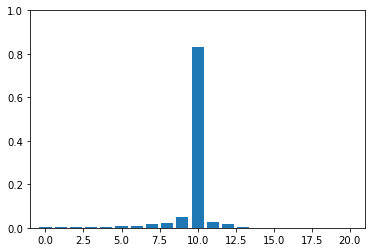

105


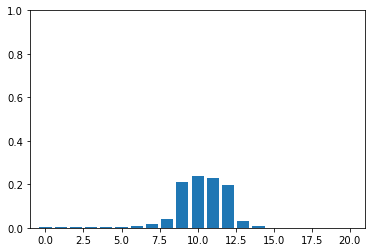

110


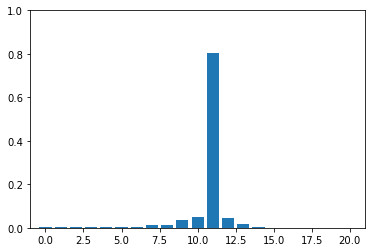

115


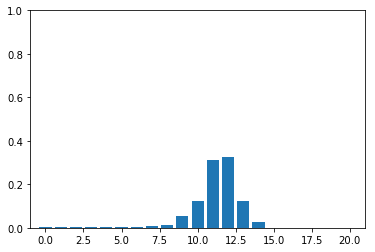

120


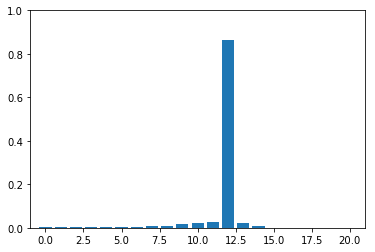

125


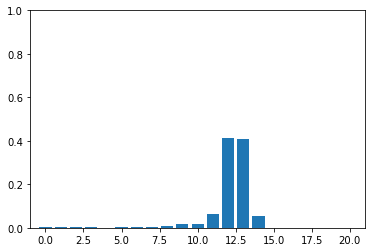

130


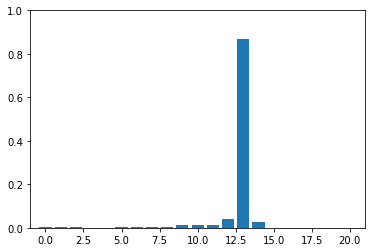

135


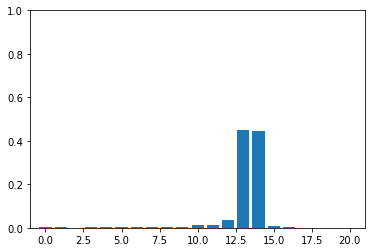

140


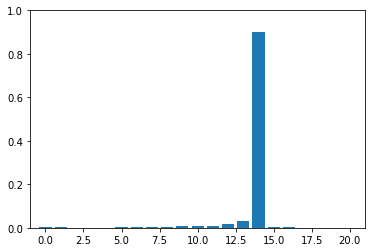

145


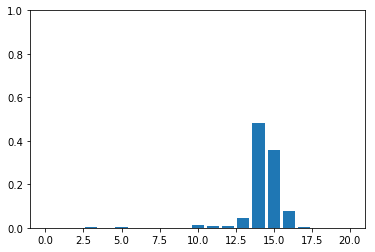

150


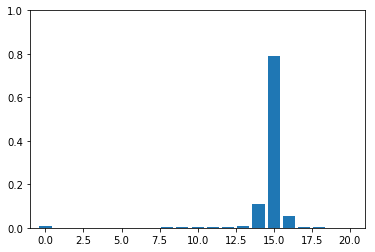

155


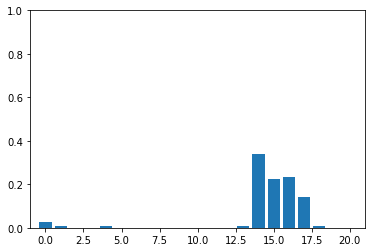

160


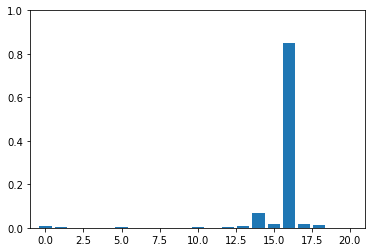

165


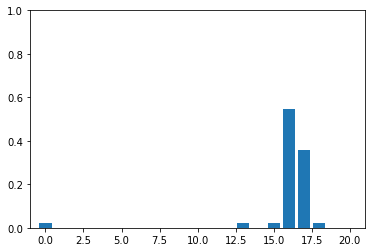

170


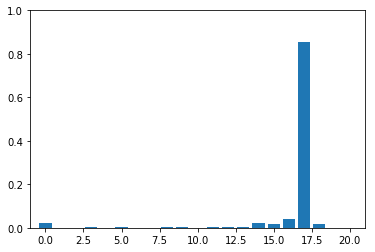

175


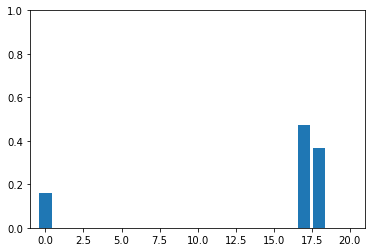

180


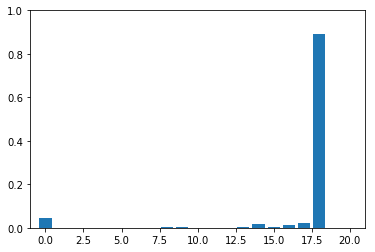

185


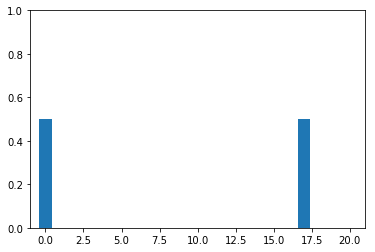

190


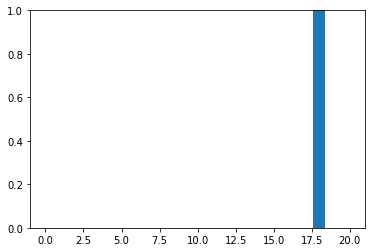

200


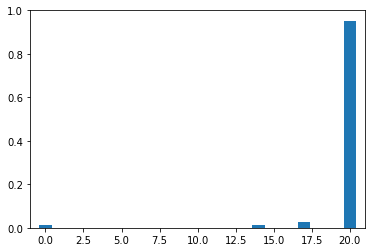

In [25]:
col='latest2_mean'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[-9999, -20, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]
-9999


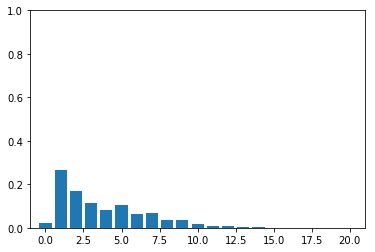

-20


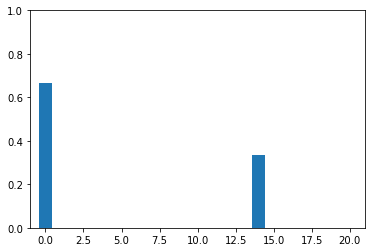

-18


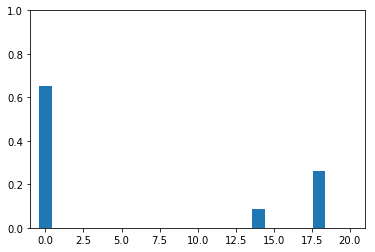

-17


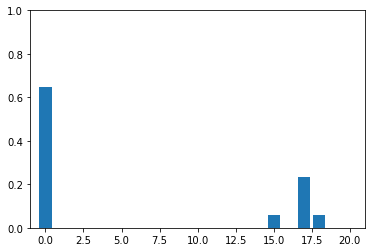

-16


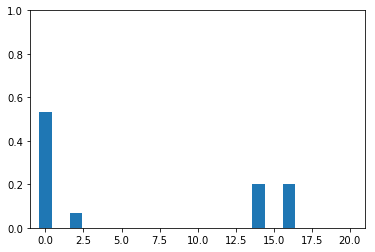

-15


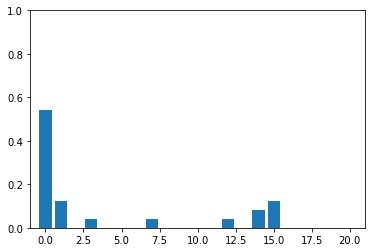

-14


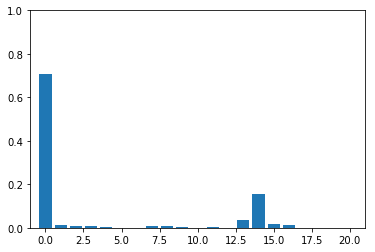

-13


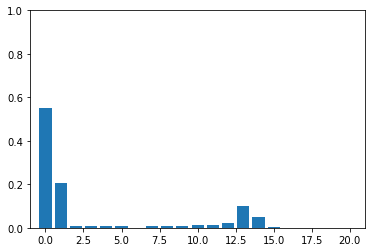

-12


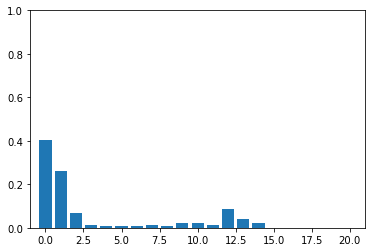

-11


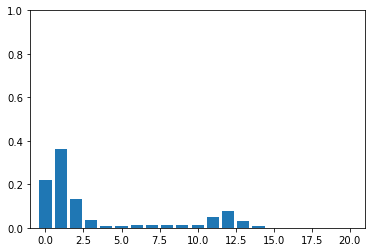

-10


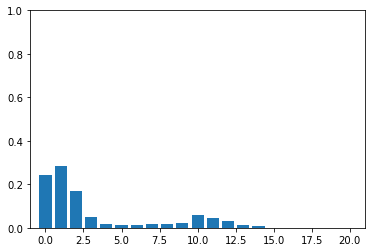

-9


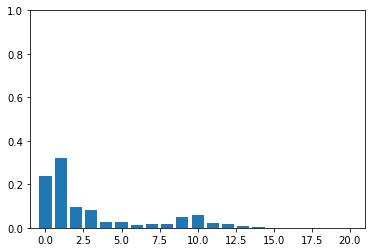

-8


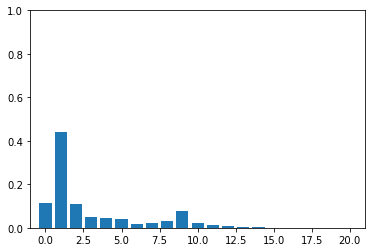

-7


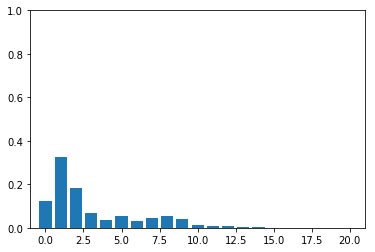

-6


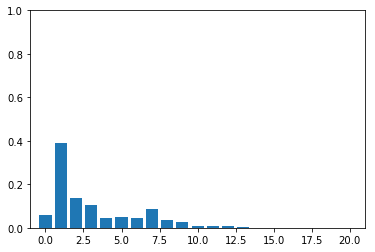

-5


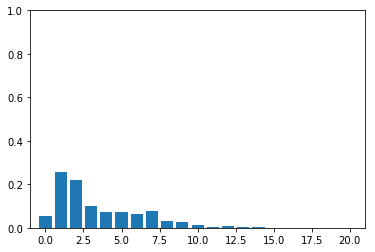

-4


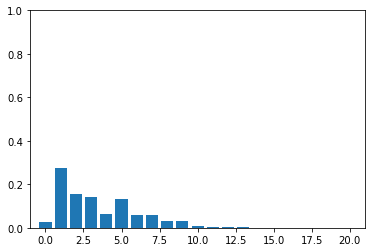

-3


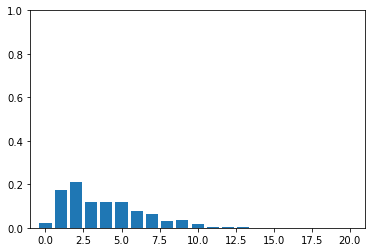

-2


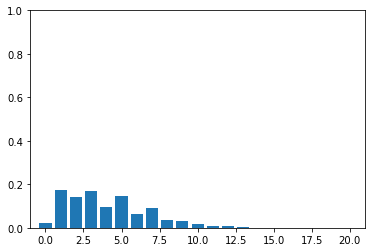

-1


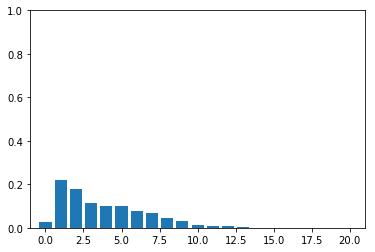

0


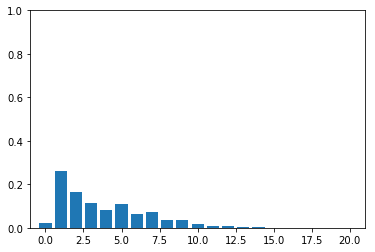

1


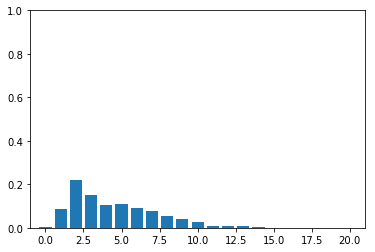

2


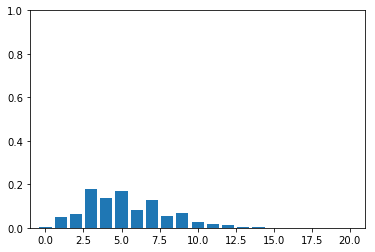

3


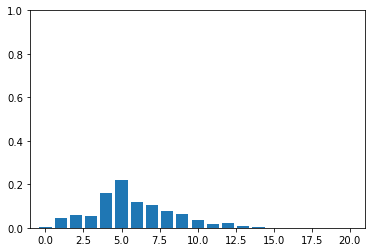

4


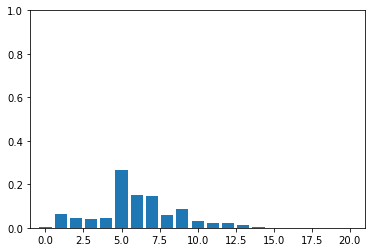

5


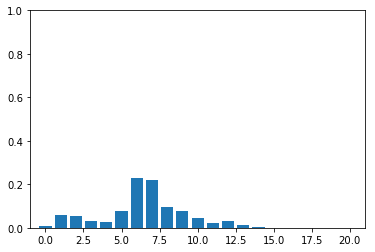

6


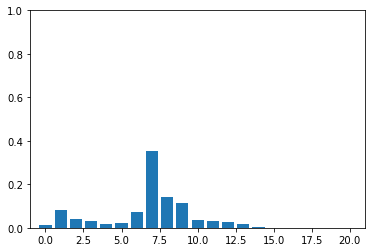

7


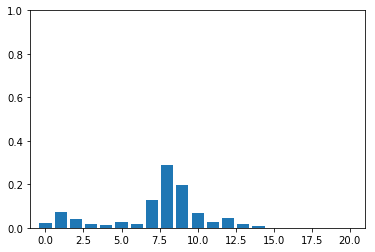

8


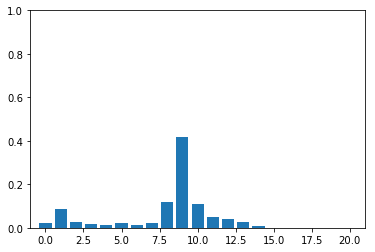

9


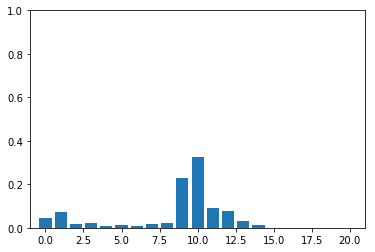

10


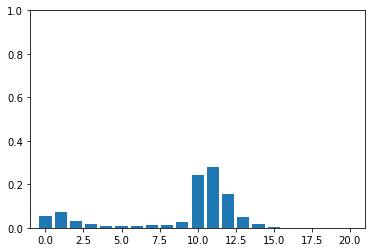

11


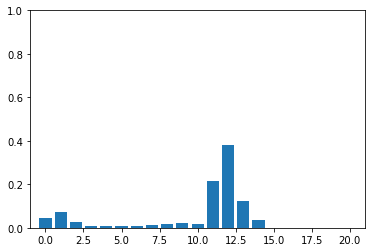

12


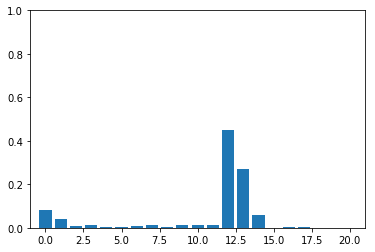

13


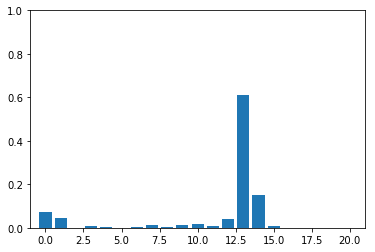

14


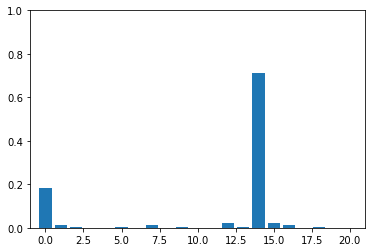

15


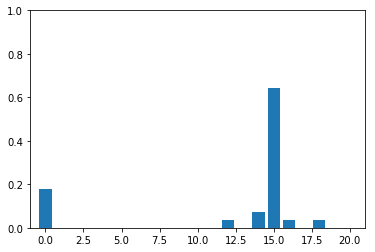

16


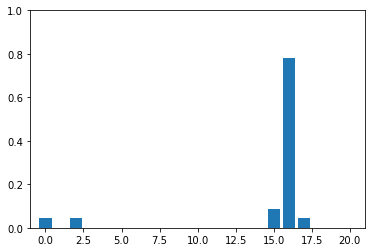

17


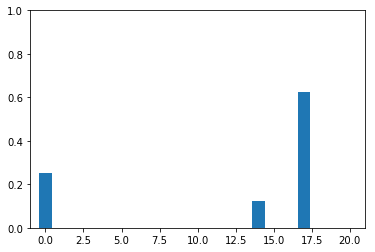

18


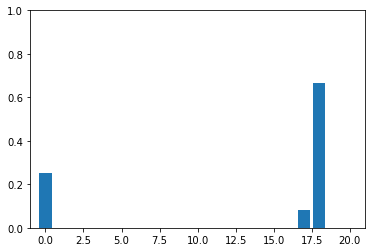

20


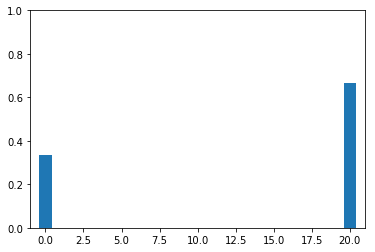

In [23]:
col='latest2_change'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[-9999, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
-9999


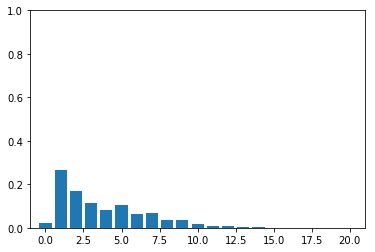

0


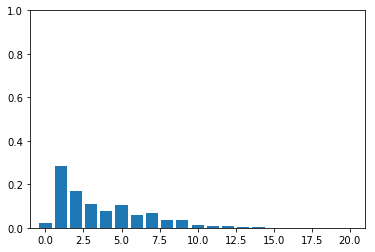

1


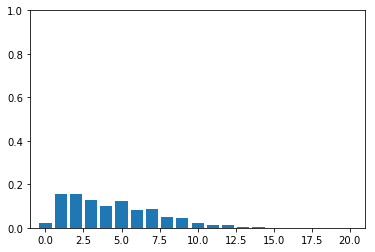

2


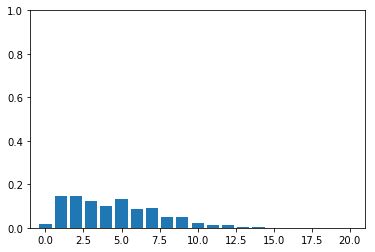

3


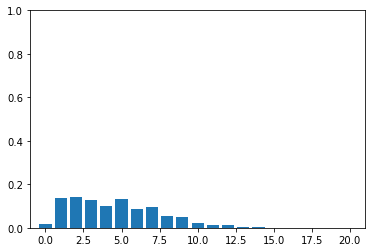

4


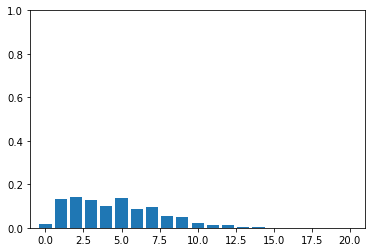

5


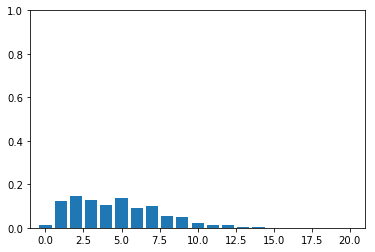

6


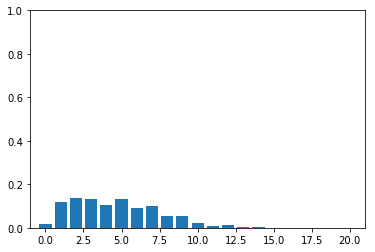

7


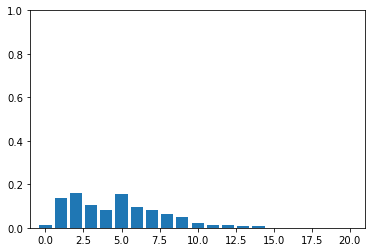

8


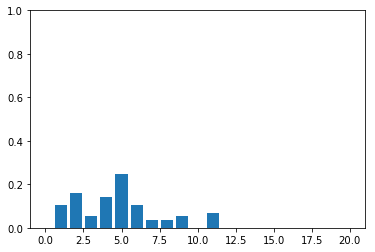

9


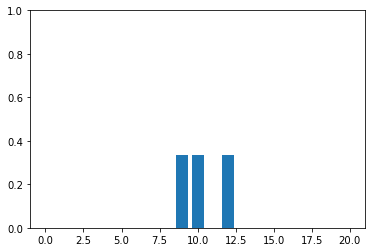

In [22]:
col='changed_count'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[-1000.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
-1000.0


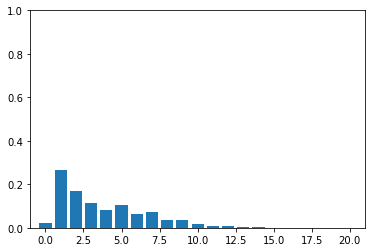

0.0


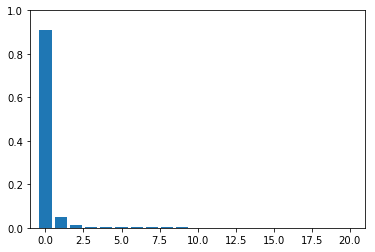

1.0


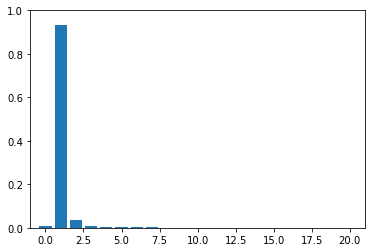

2.0


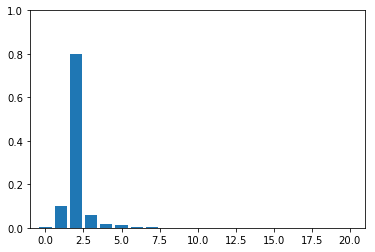

3.0


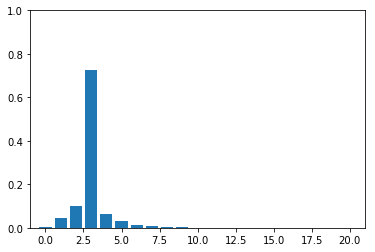

4.0


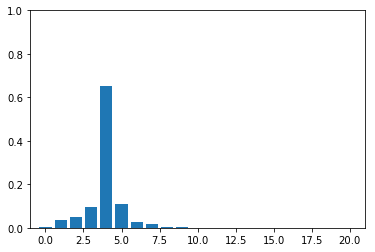

5.0


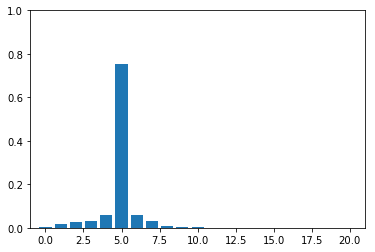

6.0


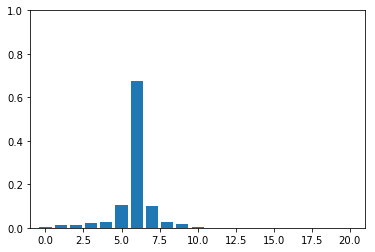

7.0


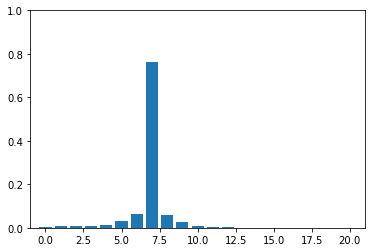

8.0


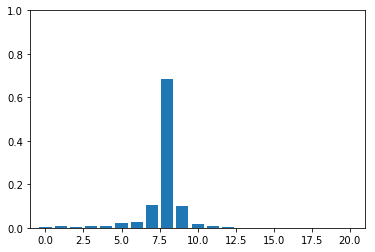

9.0


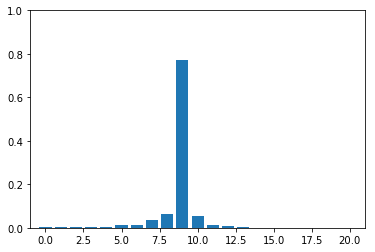

10.0


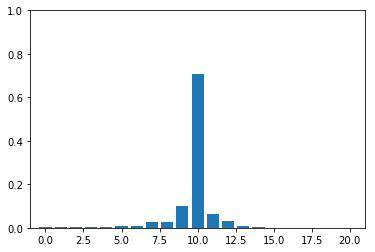

11.0


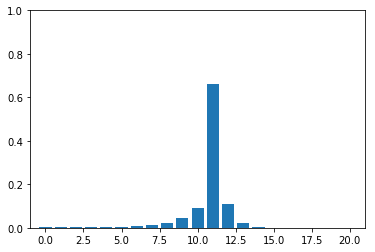

12.0


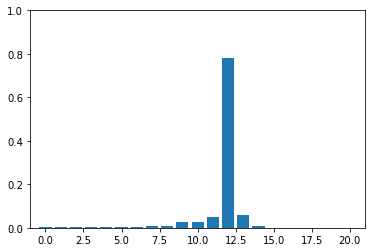

13.0


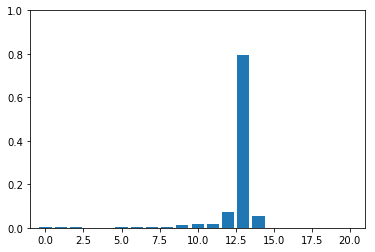

14.0


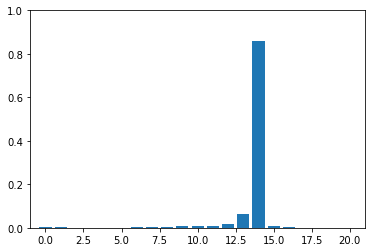

15.0


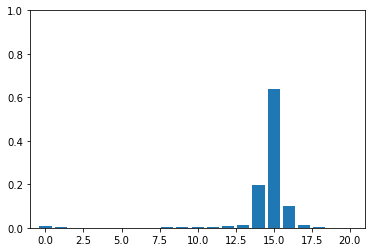

16.0


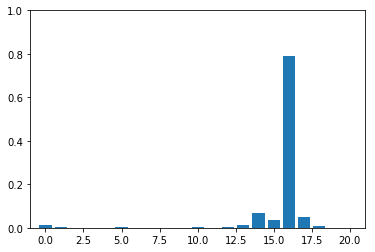

17.0


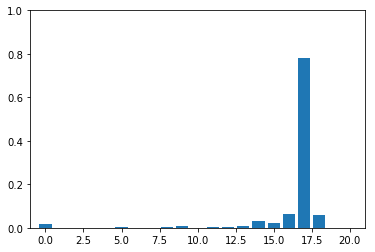

18.0


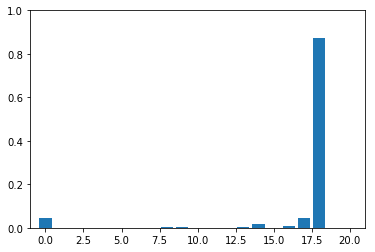

19.0


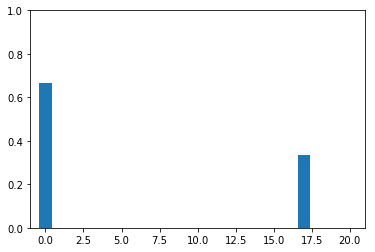

20.0


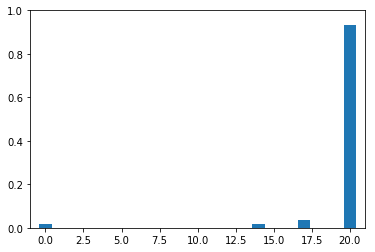

In [21]:
col='latest3_mean'
markets=sorted(list(set(np.round(train[col]/10.0))))
print markets  
for market in markets:
    df=train[np.round(train[col]/10)==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[-9999.0, 0.10000000000000001, 0.11111099999999999, 0.125, 0.14285699999999998, 0.16666700000000001, 0.20000000000000001, 0.22222199999999998, 0.25, 0.28571399999999997, 0.29999999999999999, 0.33333299999999999, 0.375, 0.40000000000000002, 0.42857099999999998, 0.44444399999999995, 0.5, 0.55555600000000005, 0.57142899999999996, 0.59999999999999998, 0.625, 0.66666700000000001, 0.69999999999999996, 0.71428599999999998, 0.75, 0.77777799999999997, 0.80000000000000004, 0.83333299999999999, 0.85714299999999999, 0.875, 0.88888899999999993, 0.90000000000000002, 1.0]
-9999.0
0.1
0.111111
0.125
0.142857
0.166667
0.2
0.222222
0.25
0.285714
0.3
0.333333
0.375
0.4
0.428571
0.444444
0.5
0.555556
0.571429
0.6
0.625
0.666667
0.7
0.714286
0.75
0.777778
0.8
0.833333
0.857143
0.875
0.888889
0.9
1.0


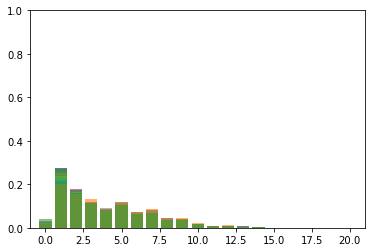

In [17]:
col='freq'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values),alpha=0.6);
    ylim([0,1])
    xlim([-1,21])    
    #plt.show()

[-9999, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
-9999
1
2
3
4
5
6
7
8
9
10


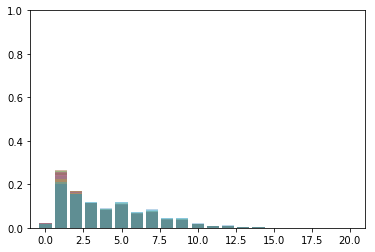

In [26]:
col='count'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values),alpha=0.3);
    ylim([0,1])
    xlim([-1,21])    
    #plt.show()

[-9999, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
-9999
1
2
3
4
5
6
7
8
9
10


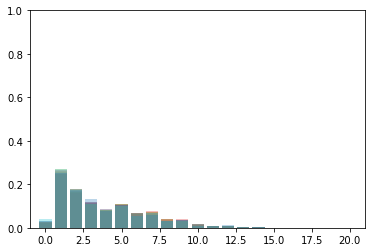

In [27]:
col='latest_gap'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values),alpha=0.3);
    ylim([0,1])
    xlim([-1,21])    
    #plt.show()

In [28]:
train[col].value_counts()

 1       16832068
-9999     3007738
 2        2022091
 3          22420
 4          14495
 5          13673
 6           8679
 7           6886
 8           4593
 9           2913
 10          2593
Name: latest_gap, dtype: int64

[-9999, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]
-9999


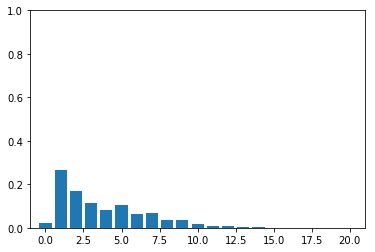

0


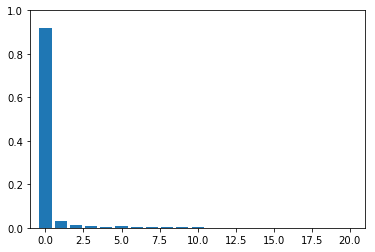

1


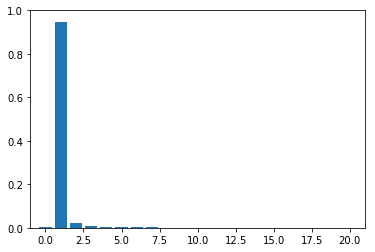

2


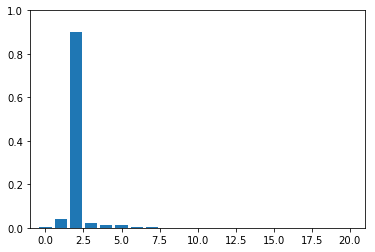

3


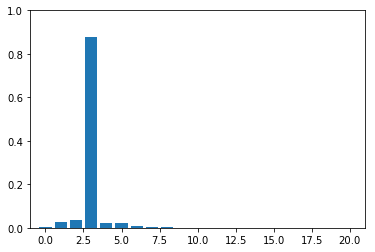

4


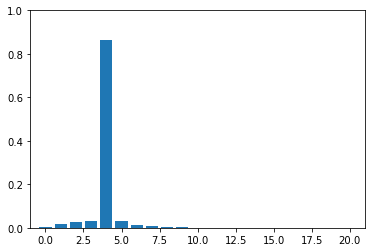

5


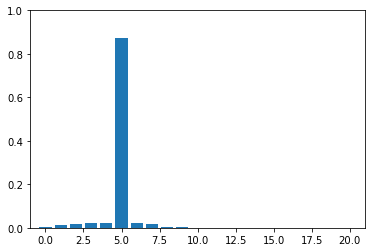

6


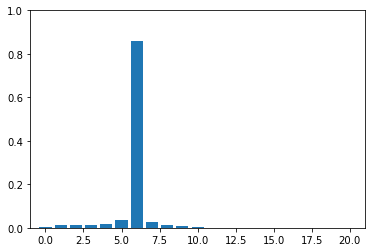

7


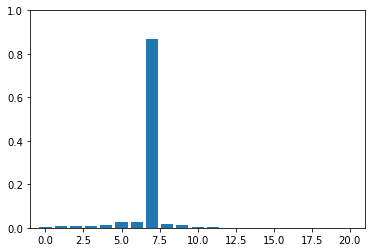

8


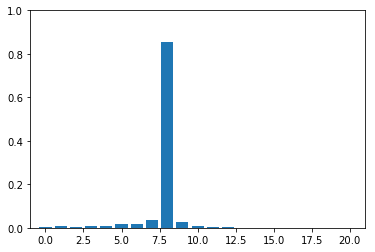

9


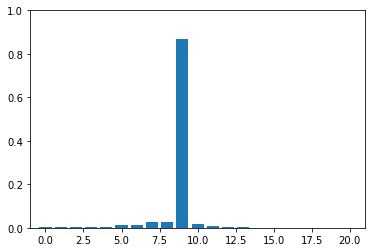

10


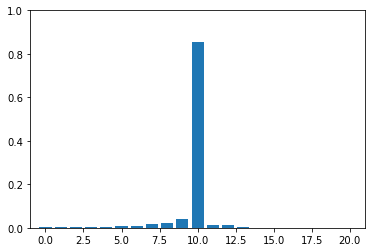

11


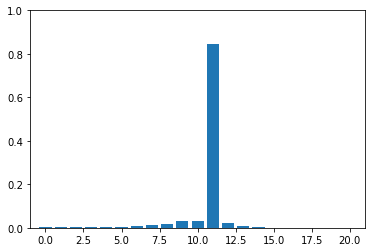

12


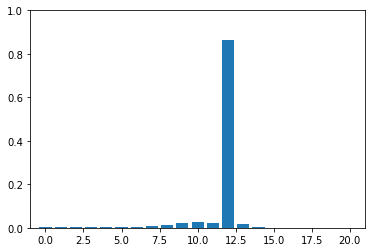

13


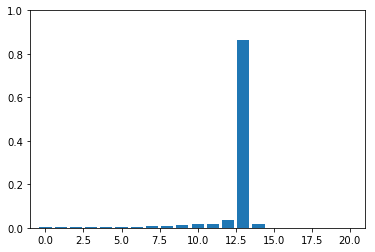

14


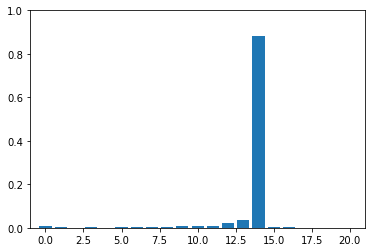

15


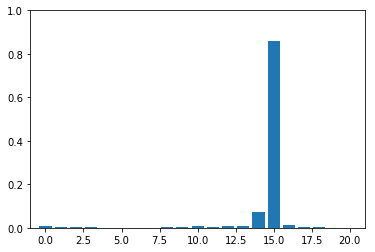

16


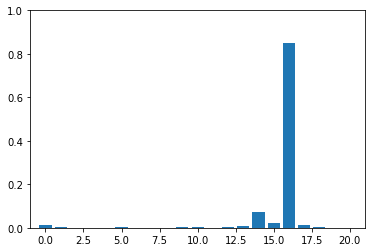

17


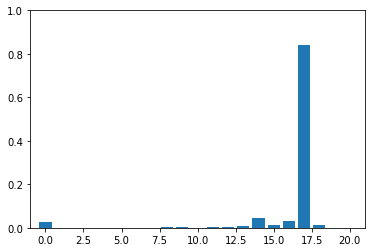

18


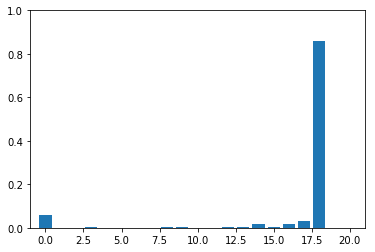

20


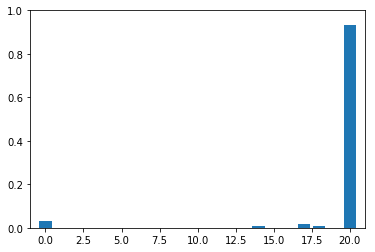

In [14]:
col='latest_target'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
0
1
2
3
4
5
6
7
8
9
10


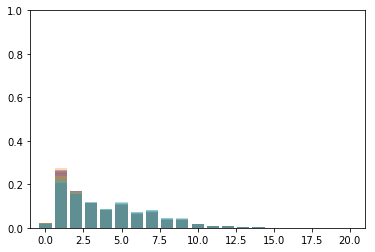

In [29]:
col='age'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values),alpha=0.3);
    ylim([0,1])
    xlim([-1,21])    
    #plt.show()

In [30]:
train[col].value_counts()

0     3007738
2     2597552
3     2502614
5     2210823
6     2028925
7     1891241
4     1760834
8     1737535
9     1470670
1     1394691
10    1335526
Name: age, dtype: int64